In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [67]:
df = pd.read_csv('/content/quikr_car.csv')

In [ ]:
df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


In [ ]:
df.shape

(892, 6)

In [ ]:
df['fuel_type'].unique()

array(['Petrol', 'Diesel', nan, 'LPG'], dtype=object)

In [ ]:
df['Price'].unique()

In [ ]:
df['name'].unique()

In [68]:
df=df[df['year'].str.isnumeric()]


In [69]:
df['year']=df['year'].astype(int)

In [70]:
df=df[df['Price']!='Ask For Price']

In [71]:
df['Price']=df['Price'].str.replace(',','').astype(int)

In [72]:
df['kms_driven']=df['kms_driven'].str.split().str.get(0).str.replace(',','')

In [74]:
df=df[df['kms_driven'].str.isnumeric()]

In [75]:
df['kms_driven']=df['kms_driven'].astype(int)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 817 entries, 0 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        817 non-null    object
 1   company     817 non-null    object
 2   year        817 non-null    int64 
 3   Price       817 non-null    int64 
 4   kms_driven  817 non-null    int64 
 5   fuel_type   816 non-null    object
dtypes: int64(3), object(3)
memory usage: 44.7+ KB


In [11]:
df.sample(5)

,name,company,year,Price,kms_driven,fuel_type
871,Hyundai i20 Select Variant,Hyundai,2011,290000,40000,Petrol
126,Nissan Micra XV,Nissan,2011,179000,41000,Petrol
533,Ford Fiesta SXi 1.6 ABS,Ford,2009,250000,56400,Petrol
423,Mahindra TUV300 T4 Plus,Mahindra,2017,610000,68000,Diesel
712,Honda WR V S MT Petrol,Honda,2009,250000,60000,Petrol


In [12]:
df.isnull().mean()*100

,0
name,0.000000
company,0.000000
year,0.000000
Price,0.000000
kms_driven,0.000000
fuel_type,0.122399


In [76]:
new_df = df.dropna()

In [77]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 816 entries, 0 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        816 non-null    object
 1   company     816 non-null    object
 2   year        816 non-null    int64 
 3   Price       816 non-null    int64 
 4   kms_driven  816 non-null    int64 
 5   fuel_type   816 non-null    object
dtypes: int64(3), object(3)
memory usage: 44.6+ KB


In [49]:
new_df.shape

(816, 6)

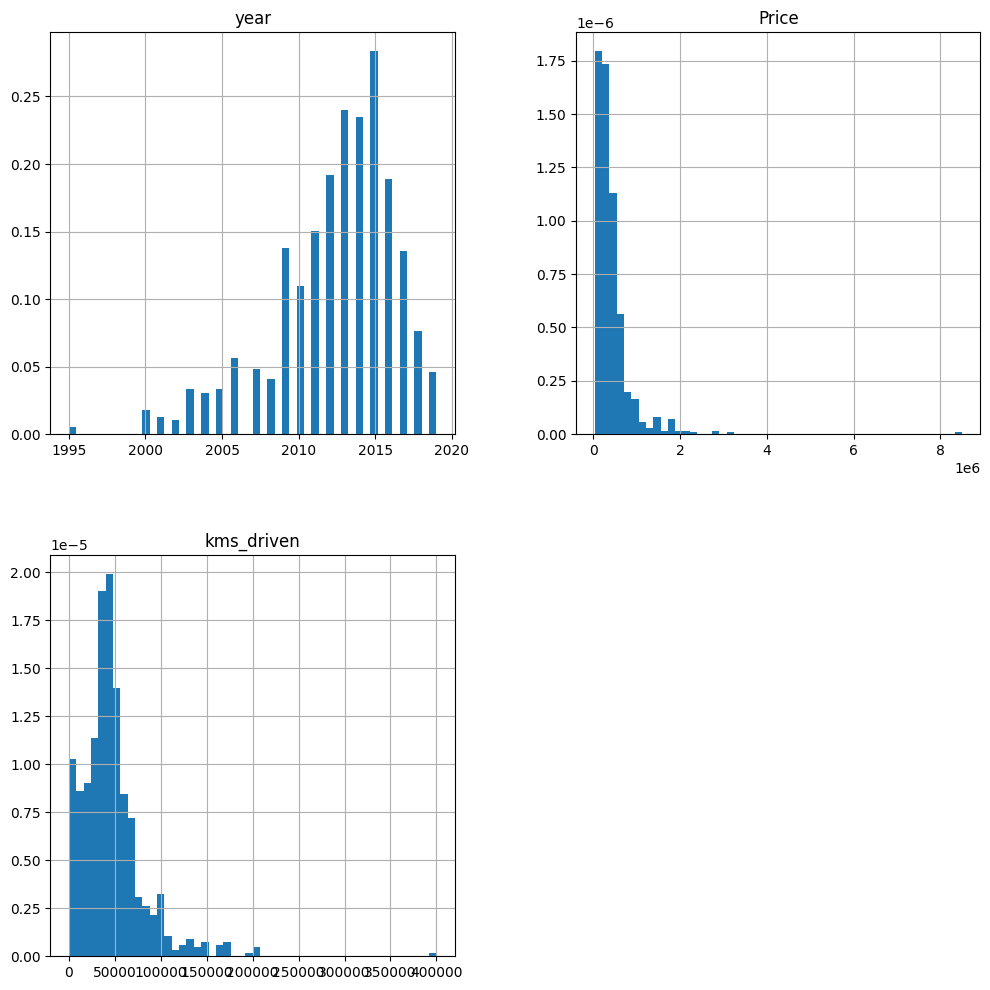

In [50]:
new_df.hist(bins=50, density=True, figsize=(12, 12))
plt.show()

<Axes: >

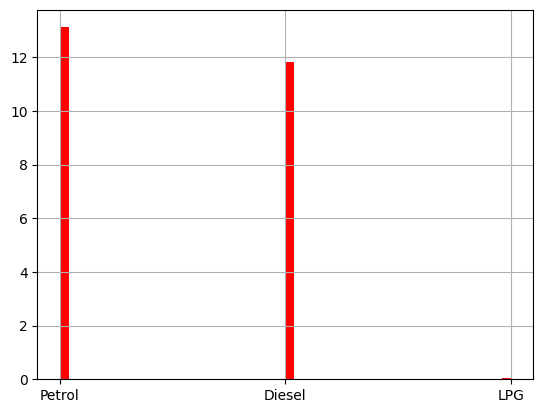

In [51]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['fuel_type'].hist(bins=50, ax=ax, density=True, color='red')

# data after cca, the argument alpha makes the color

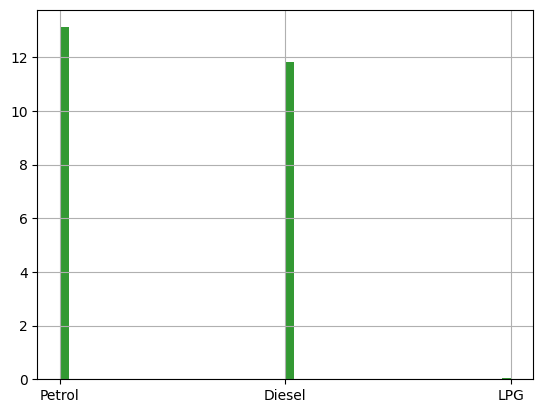

In [52]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()  # Create figure and axis correctly
new_df['fuel_type'].hist(bins=50, ax=ax, color='green', density=True, alpha=0.8)
plt.show()


<Axes: >

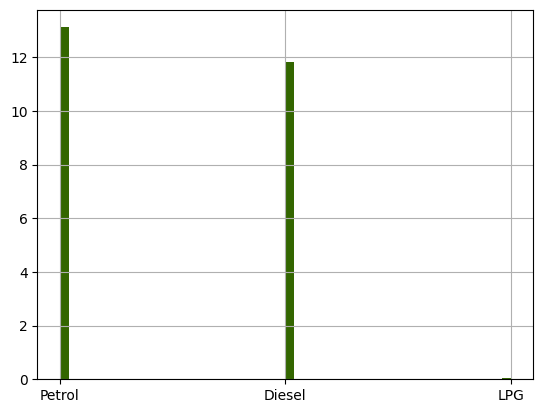

In [53]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['fuel_type'].hist(bins=50, ax=ax, density=True, color='red')

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
new_df['fuel_type'].hist(bins=50, ax=ax, color='green', density=True, alpha=0.8)

<Axes: ylabel='fuel_type'>

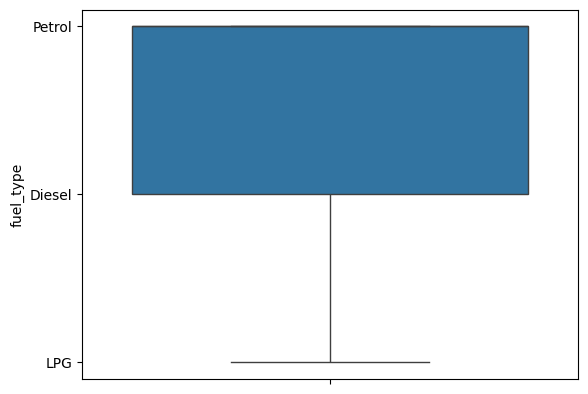

In [54]:
sns.boxplot(new_df['fuel_type'])

<Axes: xlabel='fuel_type', ylabel='kms_driven'>

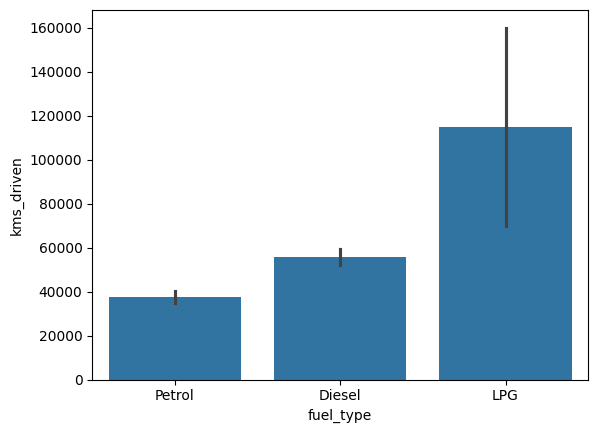

In [55]:
sns.barplot(x='fuel_type', y='kms_driven', data=df)

In [78]:
new_df['name']=new_df['name'].str.split().str.slice(start=0,stop=3).str.join(' ')

<ipython-input-78-8e7cb364bc2d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['name']=new_df['name'].str.split().str.slice(start=0,stop=3).str.join(' ')


In [79]:
new_df=new_df.reset_index(drop=True)

In [80]:
new_df

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
811,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
812,Tata Indica V2,Tata,2009,110000,30000,Diesel
813,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
814,Tata Zest XM,Tata,2018,260000,27000,Diesel


In [81]:
new_df.describe(include='all')

,name,company,year,Price,kms_driven,fuel_type
count,816,816,816.000000,8.160000e+02,816.000000,816
unique,254,25,NaN,NaN,NaN,3
top,Maruti Suzuki Swift,Maruti,NaN,NaN,NaN,Petrol
freq,51,221,NaN,NaN,NaN,428
mean,NaN,NaN,2012.444853,4.117176e+05,46275.531863,NaN
std,NaN,NaN,4.002992,4.751844e+05,34297.428044,NaN
min,NaN,NaN,1995.000000,3.000000e+04,0.000000,NaN
25%,NaN,NaN,2010.000000,1.750000e+05,27000.000000,NaN
50%,NaN,NaN,2013.000000,2.999990e+05,41000.000000,NaN
75%,NaN,NaN,2015.000000,4.912500e+05,56818.500000,NaN


<Axes: ylabel='Price'>

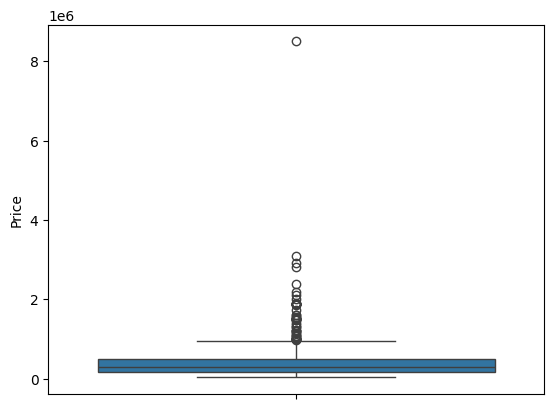

In [82]:
sns.boxplot(new_df['Price'])

In [83]:
new_df=new_df[new_df['Price']<6e6].reset_index(drop=True)

In [85]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(new_df.drop('Price', axis=1),
                                                    new_df['Price'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape


((570, 5), (245, 5))

In [86]:
from sklearn.compose import ColumnTransformer

In [87]:
ohe=OneHotEncoder()
ohe.fit(new_df[['name','company','fuel_type']])

OneHotEncoder()

In [94]:
from sklearn.compose import ColumnTransformer
column_trans=ColumnTransformer([('trf',OneHotEncoder(sparse_output=False,handle_unknown='ignore'),['name','company','fuel_type'])],
                                    remainder='passthrough')


In [95]:
lr=LinearRegression()

In [96]:
pipe=make_pipeline(column_trans,lr)

In [97]:
pipe.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['name', 'company',
                                                   'fuel_type'])])),
                ('linearregression', LinearRegression())])

In [98]:
y_pred=pipe.predict(X_test)

In [99]:
y_pred


array([ 232267.62884145,  370794.58065045,  373343.78009552,
         44358.92274538,  622008.53322758, 1469263.45291907,
        503893.51014552,  322932.71750926,   48398.13170809,
        706877.42300846,   93141.52178544,  481318.13164459,
        182000.00000466,  983970.08278114,  160983.9641699 ,
        256861.90603546,  106955.03760455,  580011.77001966,
        303893.76333355,  150635.93765668,  319501.07221675,
        227628.20250291,  844146.37489348,  518119.69863294,
        217027.10020091,  215471.218574  ,  425026.62328839,
        449284.50313993,  528625.02818506,   36549.56180497,
        490367.3897629 ,  315221.67237745,  526335.36619604,
        322320.66598652,  500830.39875432,  501000.0000063 ,
        508811.68193915,  198728.09852615,  141184.81724214,
        282484.27775771,  649127.65105563,  479379.15985281,
        370794.58065045,  394538.83636786,  287127.17760713,
        533546.22089234,  328000.91721795,   46758.75985004,
        237358.48969313,

In [100]:
r2_score(y_test,y_pred)

0.7456410515472283

In [101]:
from sklearn.model_selection import cross_val_score

# Assuming 'pipe' is your pipeline and you have X and y
scores = cross_val_score(pipe, X_train,y_train, cv=5, scoring='r2')  # or use 'neg_mean_squared_error'

print("Cross-validation scores:", scores)
print("Average score:", scores.mean())

Cross-validation scores: [0.54567993 0.57533221 0.74496759 0.76824304 0.71163572]
Average score: 0.6691716989632457


In [103]:
import pickle

In [104]:
pickle.dump(pipe,open('LinearRegressionModel.pkl','wb'))

In [105]:
pipe.predict(pd.DataFrame(columns=['name','company','year','kms_driven','fuel_type'],data=np.array(['Maruti Suzuki Swift','Maruti',2019,100,'Petrol']).reshape(1,5)))

array([425081.52151003])